<img src="images/module-logo-wbg.png" alt="drawing" width="1000" align="left"/>

# Final project

In the final project for the Python module, you will mostly reproduce the same data analysis workflow you did for the R project, but this time using Python instead.

To refresh your memory, you will be working with a data set in which records of ants (Hymenoptera: Formicidae)
on many Japanese islands have been compiled. The starting point for this project is a csv file that
contains a table of ant species belonging to several subfamilies, along with the islands on which
these ants have been reported. Other columns in this table include “Status” (whether the species
is an island species or has also been reported on the mainland), whether the specie is native, exotic
or invasive, and the latitude and longitude (Lat and Long).

Your task will be to import, wrangle, analyse and plot this data set. The project is broken up
into five different steps. At the end of each step is a specific type of output, either a table with
wrangled data or a plot. In order for you to better understand the goal in each step, these outputs
are provided within the Jupyter notebook and/or as files “output_Step1”,  . . . ,  “output_Step5”
that you can also find on Blackboard. Having these outputs available also avoids getting stuck in one step, as you can
still continue with the next step even though your code for the previous step may not work (yet).
This is an open assessment task: you can use the lecture notes, your own notes, previous code,
search the internet etc. You must not, however, communicate with other people by any means,
including but not limited to emails, phone messages, and asking questions on forums. You also
must complete all tasks using Python: no other software is permitted, including R, Excel and chatGPT. Write all your code in the Jupyter notebook, and at the end submit this file
on Blackboard. Each of the five steps is worth 8 marks, for a total of 40 marks. Within
each step, 7 marks are awarded if the code works flawlessly and produces exactly the correct result;
another 1 mark is awarded for readibility and including
informative comments in your code.

In what follows, the five steps are described in detail.

### Step 1: Data import and tidying


The raw data to be imported is contained in the Excel file “ants_Japanese_islands.csv”. 

Import all necessary packages/modules.

In [222]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Import the data as a pandas dataframe.

In [223]:
ant_Japanese_data = pd.read_csv("data/ants_Japanese_islands.csv")

Look at the head of the dataframe

In [224]:
ant_Japanese_data.head()

,Subfamily,Genus Name Pub,Species Name Pub,Status,Exotic,Island Name,Island Group,Archipelago,Biogeographic realm,Lat,Long
0,Myrmicinae,Vollenhovia,nipponica,Land + Island,Native,Kyushu,-,Kyushu,Temperate Northern Pacific,32.590000,130.800000
1,Formicinae,Polyrhachis,lamellidens,Land + Island,Native,Kyushu,-,Kyushu,Temperate Northern Pacific,32.590000,130.800000
2,Myrmicinae,Erromyrma,latinodis,Land + Island,Native,Yonaguni-jima,Yaeyama Islands,Sakishima Islands,Temperate Northern Pacific,24.455253,122.988732
3,Myrmicinae,Monomorium,pharaonis,Land + Island,Exotic,Haha-jima,Haha-jima Group,Ogasawara Islands,Central Indo-Pacific,26.667203,142.157199
4,Myrmicinae,Monomorium,pharaonis,Land + Island,Exotic,Ioujima,-,Volcano Islands,Central Indo-Pacific,24.782506,141.317206


Use two different ways to quickly gain some summary information about the data

In [225]:
ant_Japanese_data.describe()

,Lat,Long
count,3099.000000,3099.000000
mean,30.639322,131.369856
std,4.729073,5.352919
min,24.058510,122.988732
25%,26.517553,127.965820
50%,30.455885,129.871098
75%,33.782704,133.465979
max,45.905675,153.980651


In [226]:
ant_Japanese_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Subfamily            3099 non-null   object 
 1   Genus Name Pub       3099 non-null   object 
 2   Species Name Pub     3099 non-null   object 
 3   Status               3099 non-null   object 
 4   Exotic               3099 non-null   object 
 5   Island Name          3099 non-null   object 
 6   Island Group         3099 non-null   object 
 7   Archipelago          3099 non-null   object 
 8   Biogeographic realm  3099 non-null   object 
 9   Lat                  3099 non-null   float64
 10  Long                 3099 non-null   float64
dtypes: float64(2), object(9)
memory usage: 266.4+ KB


Now perform the following three tasks to make the pandas dataframe easier to work
with: a) change the column names so there are no more spaces in these names, b) replace any dashes
(“-”) indicating missing data with NaNs, and c) create a new column that contains the full species
names, with genus and specific epithet separated by an underscore (e.g., “Vollenhovia_nipponica”).

Hint: To remove the spaces in column names, see [pandas.Series.str.replace](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html).

In [227]:
ant_Japanese_data.columns = ant_Japanese_data.columns.str.replace(' ', '')
ant_Japanese_data.head()

,Subfamily,GenusNamePub,SpeciesNamePub,Status,Exotic,IslandName,IslandGroup,Archipelago,Biogeographicrealm,Lat,Long
0,Myrmicinae,Vollenhovia,nipponica,Land + Island,Native,Kyushu,-,Kyushu,Temperate Northern Pacific,32.590000,130.800000
1,Formicinae,Polyrhachis,lamellidens,Land + Island,Native,Kyushu,-,Kyushu,Temperate Northern Pacific,32.590000,130.800000
2,Myrmicinae,Erromyrma,latinodis,Land + Island,Native,Yonaguni-jima,Yaeyama Islands,Sakishima Islands,Temperate Northern Pacific,24.455253,122.988732
3,Myrmicinae,Monomorium,pharaonis,Land + Island,Exotic,Haha-jima,Haha-jima Group,Ogasawara Islands,Central Indo-Pacific,26.667203,142.157199
4,Myrmicinae,Monomorium,pharaonis,Land + Island,Exotic,Ioujima,-,Volcano Islands,Central Indo-Pacific,24.782506,141.317206


In [228]:
ant_Japanese_data.replace('-', np.nan, inplace=True)
ant_Japanese_data.head()

,Subfamily,GenusNamePub,SpeciesNamePub,Status,Exotic,IslandName,IslandGroup,Archipelago,Biogeographicrealm,Lat,Long
0,Myrmicinae,Vollenhovia,nipponica,Land + Island,Native,Kyushu,NaN,Kyushu,Temperate Northern Pacific,32.590000,130.800000
1,Formicinae,Polyrhachis,lamellidens,Land + Island,Native,Kyushu,NaN,Kyushu,Temperate Northern Pacific,32.590000,130.800000
2,Myrmicinae,Erromyrma,latinodis,Land + Island,Native,Yonaguni-jima,Yaeyama Islands,Sakishima Islands,Temperate Northern Pacific,24.455253,122.988732
3,Myrmicinae,Monomorium,pharaonis,Land + Island,Exotic,Haha-jima,Haha-jima Group,Ogasawara Islands,Central Indo-Pacific,26.667203,142.157199
4,Myrmicinae,Monomorium,pharaonis,Land + Island,Exotic,Ioujima,NaN,Volcano Islands,Central Indo-Pacific,24.782506,141.317206


In [229]:
ant_Japanese_data['FullSpeciesName'] = ant_Japanese_data['GenusNamePub'] + '_' + ant_Japanese_data['SpeciesNamePub']
ant_Japanese_data.head()

,Subfamily,GenusNamePub,SpeciesNamePub,Status,Exotic,IslandName,IslandGroup,Archipelago,Biogeographicrealm,Lat,Long,FullSpeciesName
0,Myrmicinae,Vollenhovia,nipponica,Land + Island,Native,Kyushu,NaN,Kyushu,Temperate Northern Pacific,32.590000,130.800000,Vollenhovia_nipponica
1,Formicinae,Polyrhachis,lamellidens,Land + Island,Native,Kyushu,NaN,Kyushu,Temperate Northern Pacific,32.590000,130.800000,Polyrhachis_lamellidens
2,Myrmicinae,Erromyrma,latinodis,Land + Island,Native,Yonaguni-jima,Yaeyama Islands,Sakishima Islands,Temperate Northern Pacific,24.455253,122.988732,Erromyrma_latinodis
3,Myrmicinae,Monomorium,pharaonis,Land + Island,Exotic,Haha-jima,Haha-jima Group,Ogasawara Islands,Central Indo-Pacific,26.667203,142.157199,Monomorium_pharaonis
4,Myrmicinae,Monomorium,pharaonis,Land + Island,Exotic,Ioujima,NaN,Volcano Islands,Central Indo-Pacific,24.782506,141.317206,Monomorium_pharaonis


To see how the output from this step should look like, open the file “output_Step1.csv”.

### Step 2: Extracting information from the data

Write code that produces answers to the following questions about the data:

1) How many data entries are there for the subfamily Myrmicinae?

In [230]:
len(ant_Japanese_data[ant_Japanese_data['Subfamily']=="Myrmicinae"])

1571

2) How many data entries are there for native species on the island of Kyushu?

In [231]:
len(ant_Japanese_data[(ant_Japanese_data['Exotic'] == "Native") & (ant_Japanese_data['Archipelago'] == "Kyushu")])

196

3) What longitudinal range do the species in the data set cover?

In [232]:
ant_Japanese_data['Long'].max() - ant_Japanese_data['Long'].min()

30.991918999999996

In [233]:
ant_Japanese_data['Long'].min()

122.988732

In [234]:
ant_Japanese_data['Long'].max() 

153.980651

4) How many different ant species does the data set contain?

In [235]:
ant_Japanese_data['FullSpeciesName'].nunique()

270

5) Several species have the same specific epithet? (e.g., Myrmecina amamiana and Vollenhovia amamania). Identify which epithets are repeated. 

**THIS IS CHALLENGING! You may need to use methods/functions that we didn't encounter during the course (e.g. `pandas.Series.isin`). Remember StackOverflow is your friend! You might also consider coming back to this problem once you have completed the rest of the project**

To see how the output from Step 2 should look like, open the file “output_Step2.csv”.

In [236]:
(ant_Japanese_data.filter(['SpeciesNamePub','GenusNamePub'])
 .drop_duplicates()
 .groupby(['SpeciesNamePub'])
 .agg(n = ('SpeciesNamePub', 'count'))
 .query('n>1')
 .filter('SpeciesNamePub')
)

""
SpeciesNamePub
amamiana
bishamon
hayashi
itoi
japonica
japonicus
kinomurai
koreanus
luteipes


### Step 3: Plotting the number of species per island

Some of the species in the species in the data set are only reported on a single island, some on many.
Produce a figure containing four histograms for the number of islands that the species are found
on, one each for the species classified as “Exotic”, “Indoor introduced”, “Invasive” and “Native”
(column “Exotic” in the data set). 
To see how the output from this step should look like, open the file “output_Step3.pdf”; try to
produce a plot that looks as similar to this one as possible (including axis labels, style etc.).

In [237]:
nIslandsPerSpecies = (ant_Japanese_data.groupby(['FullSpeciesName','Exotic'])
                      .agg(nIslands = ('FullSpeciesName', 'count'))
                      .reset_index()
                     )
nIslandsPerSpecies

,FullSpeciesName,Exotic,nIslands
0,Acropyga_kinomurai,Native,2
1,Acropyga_nipponensis,Native,9
2,Acropyga_sauteri,Native,18
3,Acropyga_yaeyamensis,Native,2
4,Aenictus_lifuiae,Native,2
...,...,...,...
272,Vollenhovia_emeryi,Native,32
273,Vollenhovia_nipponica,Native,2
274,Vollenhovia_okinawana,Native,4
275,Vollenhovia_sakishimana,Native,7


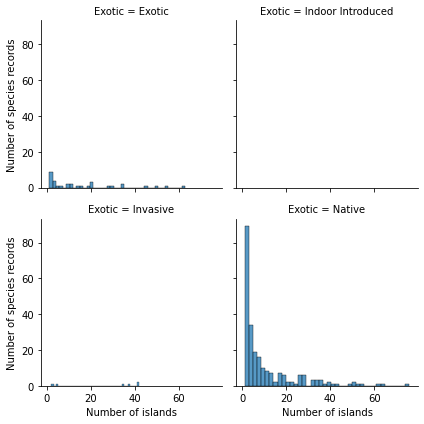

In [244]:
g = sns.FacetGrid(nIslandsPerSpecies, col='Exotic', height=3, aspect=1, col_wrap=2, 
                  col_order = ['Exotic','Indoor Introduced','Invasive','Native'])
g.map(sns.histplot,'nIslands', bins = 40)
g.set_axis_labels(x_var="Number of islands", y_var="Number of species records")

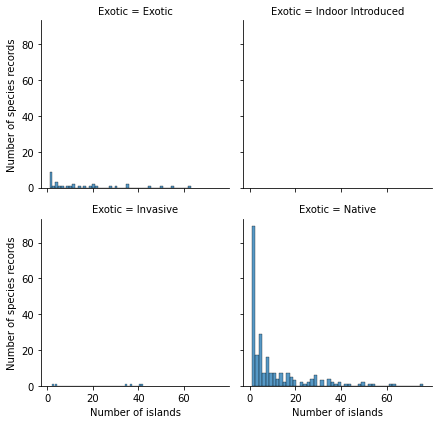

### Step 4: Combining the data with geographical information

For this and the following step we are interested in the opposite question: how many species have
been reported for the various islands, and how do these species numbers relate to island size and
population density?
First, import the second data file provided, “Japanese_islands.csv”. This file contains data on
the area (in kmˆ2) and (human!) population size of several Japanese islands. Second, produce
a summarised data set containing the number of reported species for each of the islands. Then
add the geographical information (area and population size) to the species numbers per island
data set. Only islands for which both geographical information and information about ant species
exist should be retained. Finally, add an additional column for population density (population per
square kilometer).
To see how the output from this step should look like, open the file “output_Step4.csv”.

Hint: To replace the comma separators in the `Population` column, use the [`pandas.DataFrame.replace`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) method with `regex = True`.

In [245]:
Japanese_island_data = pd.read_csv("data/Japanese_islands.csv")
Japanese_island_data.head()

,Name,Area,Population
0,Honshu,"225,800","104,000,000"
1,Kyushu,"36,782","12,970,479"
2,Hokkaido,"83,423","5,348,102"
3,Shikoku,"18,297","3,796,687"
4,Okinawa,"1,206","1,301,462"


In [246]:
Japanese_island_data['Population']= Japanese_island_data['Population'].replace(to_replace = ",", value = "", regex = True).astype('int64')

In [247]:
Japanese_island_data['Area']= Japanese_island_data['Area'].replace(to_replace = ",", value = "", regex = True).astype('int64')

In [248]:
Japanese_island_data.head()

,Name,Area,Population
0,Honshu,225800,104000000
1,Kyushu,36782,12970479
2,Hokkaido,83423,5348102
3,Shikoku,18297,3796687
4,Okinawa,1206,1301462


In [249]:
Japanese_island_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        71 non-null     object
 1   Area        71 non-null     int64 
 2   Population  71 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ KB


Create a column `SharedIslandName` to join between 2 datasets.

In [250]:
Japanese_island_data['SharedIslandName']=Japanese_island_data['Name'].str.lower().str.replace("-","").replace(" ","")                                  

In [251]:
Japanese_island_data.head()

,Name,Area,Population,SharedIslandName
0,Honshu,225800,104000000,honshu
1,Kyushu,36782,12970479,kyushu
2,Hokkaido,83423,5348102,hokkaido
3,Shikoku,18297,3796687,shikoku
4,Okinawa,1206,1301462,okinawa


In [252]:
group_ant_Japanese_data = (ant_Japanese_data.groupby('IslandName')
                              .agg(nSpecies = ('SpeciesNamePub','count'))
                              .reset_index())

In [253]:
group_ant_Japanese_data

,IslandName,nSpecies
0,Aguni-jima,13
1,Aino-shima,15
2,Akajima,1
3,Akuseki-jima,28
4,Amami-Oshima,71
...,...,...
132,Yagishirito,1
133,Yakushima,94
134,Yokoate-jima,13
135,Yonaguni-jima,52


In [254]:
group_ant_Japanese_data['SharedIslandName']=group_ant_Japanese_data['IslandName'].str.lower().str.replace("-","").replace(" ","")                                  

In [255]:
group_ant_Japanese_data.head()

,IslandName,nSpecies,SharedIslandName
0,Aguni-jima,13,agunijima
1,Aino-shima,15,ainoshima
2,Akajima,1,akajima
3,Akuseki-jima,28,akusekijima
4,Amami-Oshima,71,amamioshima


In [256]:
combined_data = (Japanese_island_data.join(group_ant_Japanese_data.set_index('SharedIslandName'), on='SharedIslandName')
                                     .dropna()
                                     .filter(['IslandName','nSpecies','Area','Population'])
                                     .reset_index()
                )
combined_data.head()

,index,IslandName,nSpecies,Area,Population
0,0,Honshu,26.0,225800,104000000
1,1,Kyushu,37.0,36782,12970479
2,2,Hokkaido,20.0,83423,5348102
3,3,Shikoku,33.0,18297,3796687
4,4,Okinawa,112.0,1206,1301462


In [257]:
combined_data['PopDen'] = combined_data['Population']/combined_data['Area']

In [258]:
combined_data

,index,IslandName,nSpecies,Area,Population,PopDen
0,0,Honshu,26.0,225800,104000000,460.584588
1,1,Kyushu,37.0,36782,12970479,352.631151
2,2,Hokkaido,20.0,83423,5348102,64.108244
3,3,Shikoku,33.0,18297,3796687,207.503252
4,4,Okinawa,112.0,1206,1301462,1079.155887
5,8,Miyako-jima,57.0,158,55914,353.886076
6,9,Sado,27.0,854,55474,64.957845
7,10,Ishigaki,81.0,222,47000,211.711712
8,11,Tsushima,48.0,709,39716,56.016925
9,14,Tanegashima,38.0,444,33000,74.324324


,IslandName,nspp,Area,Population,PopDen
0,Hachijo-jima,41,63,8363,132.746032
1,Hirado,40,163,21355,131.012270
2,Hokkaido,20,83423,5348102,64.108244
3,Honshu,26,225800,104000000,460.584588
4,Ie-jima,2,23,4198,182.521739
5,Iki,32,134,28008,209.014925
6,Iriomote,77,289,2347,8.121107
7,Ishigaki,81,222,47000,211.711712
8,Izu Oshima,49,91,8179,89.879121
9,Kamikoshiki-jima,32,45,2796,62.133333


### Step 5: Plotting species numbers vs. island size

Using the wrangled data from Step 4, produce a scatter plot of number of reported species (y-axis)
versus the area for each island. In addition, the data points should be colours by population density,
with a gradient from black (low density) to red (high density). 

To see how the output from this step should look like, open the file “output_Step5.pdf”; try to
produce a plot that looks as similar to this one as possible (including axis labels, style etc.).

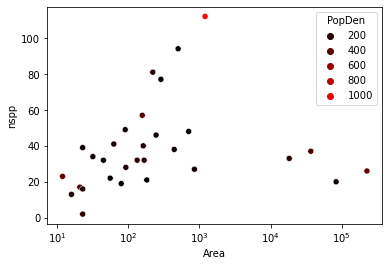

In [259]:
from matplotlib.colors import LinearSegmentedColormap

colors = [(0, 0, 0), (1, 0, 0)] # first color is black, last is red
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)
sns.scatterplot(x= 'Area', y='nSpecies', data = combined_data, hue = 'PopDen', palette=cm)
plt.xlabel('Area')
plt.ylabel('nspp')
plt.xscale('symlog')

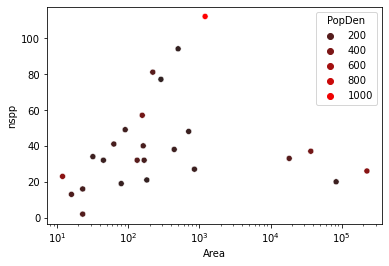